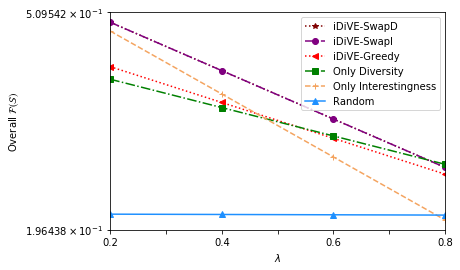

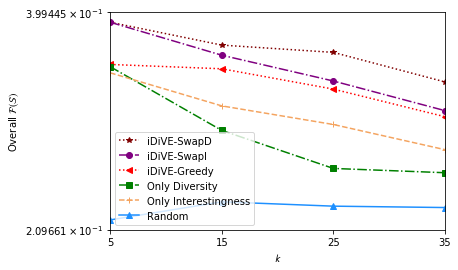

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "pruned_objf_flights1.csv"
output_plot_objf = "log_scale_REAL_OBJF_pruned_objf_flights.png"
output_plot_tradeoff = "log_scale_REAL_TRADEOFF_pruned_objf_flights.png"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]
#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_yscale('symlog')
plt.autolayout : True
plt.savefig(output_plot_tradeoff, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

#df_objf = df_objf.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df_objf = df_objf[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]


ax = df_objf.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
ax.set_yscale('symlog')
plt.autolayout : True

plt.savefig(output_plot_objf, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

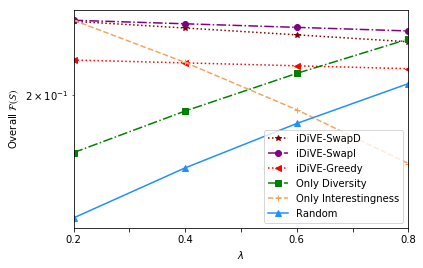

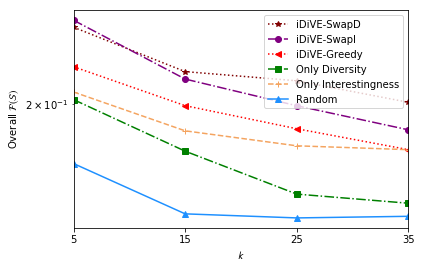

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "pruned_objf_disease1.csv"
output_plot_objf = "log_scale_REAL_OBJF_pruned_objf_heart.png"
output_plot_tradeoff = "log_scale_REAL_TRADEOFF_pruned_objf_heart.png"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]
#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_yscale('log')
plt.autolayout : True
plt.savefig(output_plot_tradeoff, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

#df_objf = df_objf.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df_objf = df_objf[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]


ax = df_objf.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
ax.set_yscale('log')
plt.autolayout : True

plt.savefig(output_plot_objf, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

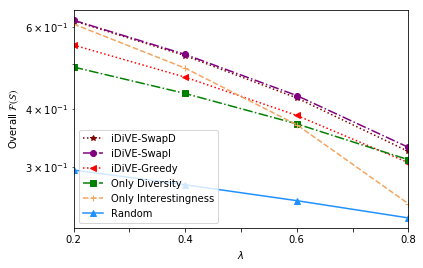

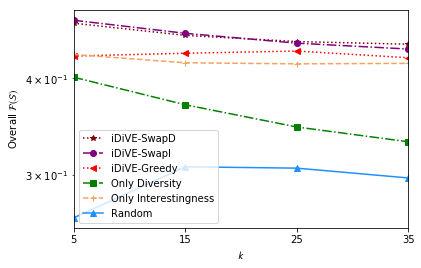

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "pruned_objf_superstore1.csv"
output_plot_objf = "log_scale_REAL_OBJF_pruned_objf_superstore.png"
output_plot_tradeoff = "log_scale_REAL_TRADEOFF_pruned_objf_superstore.png"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]
#df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
ax.set_yscale('log')
plt.autolayout : True
plt.savefig(output_plot_tradeoff, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

#df_objf = df_objf.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df_objf = df_objf[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]


ax = df_objf.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
ax.set_yscale('log')
plt.autolayout : True

plt.savefig(output_plot_objf, dpi = 1000, bbox_inches='tight')
#ax.set_ylim(ymin=0)
plt.show()

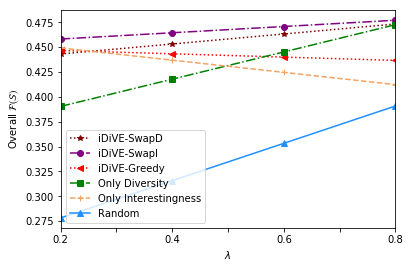

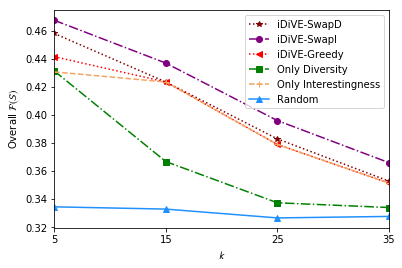

In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "pruned_objf_generate.csv"
output_plot_objf = "REAL_OBJF_pruned_objf_generate.png"
output_plot_tradeoff = "REAL_TRADEOFF_pruned_objf_generate.png"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]
df = df.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df = df[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'SeeDB':'SBI','Greedy':'SBD','pGreedyPruning':'SBID-Greedy', 'SwapU':'SBID-SwapI', 'SwapD':'SBID-SwapD'})
df_objf = df_objf[['SBID-SwapD','SBID-SwapI','SBID-Greedy','SBD','SBI','Random']]
df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['*','o','<','s','+','^']
linestyles = [':','-.',':','-.','--','-',]


ax = df_objf.plot(kind='line', color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.savefig(output_plot_objf, dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()